# Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting visualization styles
sns.set(style="whitegrid", palette="viridis")
%matplotlib inline

# Load datasets
customers = pd.read_csv(r"C:\Users\Abhay Thakur\Downloads\Customers.csv")
products = pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\Abhay Thakur\Downloads\Transactions.csv')

# Displaying the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

print("Products Dataset:")
display(products.head())

print("Transactions Dataset:")
display(transactions.head())


Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Findings:
Customers.csv:
Contains customer profiles with 4 columns: CustomerID, CustomerName, Region, and SignupDate.

Products.csv:
Contains product details with 4 columns: ProductID, ProductName, Category, and Price.
Price column looks appropriate for analysis.

Transactions.csv:
Contains transaction details with 7 columns, including CustomerID, ProductID, and TotalValue.
TotalValue needs to be verified for consistency with Price × Quantity

## Data Cleaning
### Missing Values and Duplicates

In [24]:
# Check for missing values
print("Missing values in Customers dataset:\n", customers.isnull().sum())
print("\nMissing values in Products dataset:\n", products.isnull().sum())
print("\nMissing values in Transactions dataset:\n", transactions.isnull().sum())

# Check for duplicates
print(f"Duplicate rows in Customers dataset: {customers.duplicated().sum()}")
print(f"Duplicate rows in Products dataset: {products.duplicated().sum()}")
print(f"Duplicate rows in Transactions dataset: {transactions.duplicated().sum()}")


Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
Brand          0
dtype: int64

Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Duplicate rows in Customers dataset: 0
Duplicate rows in Products dataset: 0
Duplicate rows in Transactions dataset: 0


### Findings
No missing values were found in any of the datasets (Customers.csv, Products.csv, and Transactions.csv). This indicates that the data is complete and does not require imputation or removal of rows/columns due to missing values.

No duplicate rows were found in any of the datasets. The data is clean and does not require further deduplication.

All datasets are well-structured and ready for analysis. This ensures that we can proceed directly to exploratory data analysis (EDA) without additional cleaning.

# Feature Engineering

In [2]:
# Extracting Brand Name as the first word in ProductName
products["Brand"] = products["ProductName"].str.split().str[0]

# Removing Brand Name from ProductName
products["ProductName"] = products.apply(
    lambda row: row["ProductName"].replace(row["Brand"] + " ", ""), axis=1
)

# Displaying the updated products dataset
print("Products Dataset After Feature Engineering:")
display(products.head())


Products Dataset After Feature Engineering:


,ProductID,ProductName,Category,Price,Brand
0,P001,Biography,Books,169.30,ActiveWear
1,P002,Smartwatch,Electronics,346.30,ActiveWear
2,P003,Biography,Books,44.12,ComfortLiving
3,P004,Rug,Home Decor,95.69,BookWorld
4,P005,T-Shirt,Clothing,429.31,TechPro


# Merging the Datasets

In [3]:
# Merging transactions with products
transactions_with_products = transactions.merge(
    products[["ProductID", "ProductName", "Category", "Brand", "Price"]], on="ProductID", how="left"
)

# Displaying the merged dataset
print("Transactions with Products Merged:")
display(transactions_with_products.head())


Transactions with Products Merged:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Brand,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Bluetooth Speaker,Electronics,ComfortLiving,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Bluetooth Speaker,Electronics,ComfortLiving,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Bluetooth Speaker,Electronics,ComfortLiving,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Bluetooth Speaker,Electronics,ComfortLiving,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Bluetooth Speaker,Electronics,ComfortLiving,300.68


In [5]:
# Merging the above dataset with customers
transactions_full = transactions_with_products.merge(
    customers[["CustomerID", "Region"]], on="CustomerID", how="left"
)

transactions_full = transactions_full.rename(columns={
    'Price_y': 'Price',})

# Selecting only the necessary columns
transactions_full = transactions_full[[
    "TransactionID", "CustomerID", "Region", "Brand", "ProductName", "Category", "Price", "TransactionDate"
]]

# Converting TransactionDate to datetime format
transactions_full["TransactionDate"] = pd.to_datetime(transactions_full["TransactionDate"])

# Displaying the final merged dataset
print("Final Merged Dataset:")
display(transactions_full.head())


Final Merged Dataset:


,TransactionID,CustomerID,Region,Brand,ProductName,Category,Price,TransactionDate
0,T00001,C0199,Europe,ComfortLiving,Bluetooth Speaker,Electronics,300.68,2024-08-25 12:38:23
1,T00112,C0146,Asia,ComfortLiving,Bluetooth Speaker,Electronics,300.68,2024-05-27 22:23:54
2,T00166,C0127,Europe,ComfortLiving,Bluetooth Speaker,Electronics,300.68,2024-04-25 07:38:55
3,T00272,C0087,South America,ComfortLiving,Bluetooth Speaker,Electronics,300.68,2024-03-26 22:55:37
4,T00363,C0070,Europe,ComfortLiving,Bluetooth Speaker,Electronics,300.68,2024-03-21 15:10:10


In [11]:
# Saving the transformed dataset for future use
transactions_full.to_csv("Transformed_Transactions.csv", index=False)
print("Transformed dataset saved as 'Transformed_Transactions.csv'")


Transformed dataset saved as 'Transformed_Transactions.csv'


# Exploratory Data Analysis (EDA)

## Brand-Wise Revenue

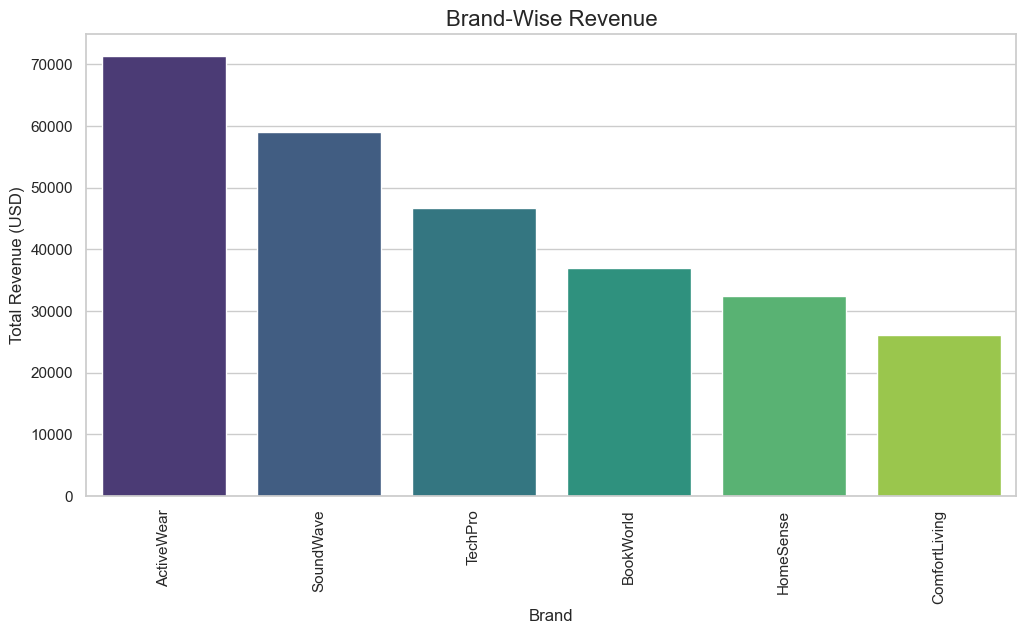

In [6]:
# Aggregating revenue by Brand
brand_revenue = transactions_full.groupby("Brand")["Price"].sum().reset_index().sort_values(by="Price", ascending=False)

# Plotting Brand-Wise Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_revenue, x="Brand", y="Price", palette="viridis")
plt.title("Brand-Wise Revenue", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=90)
plt.show()


## Category-Wise Revenue

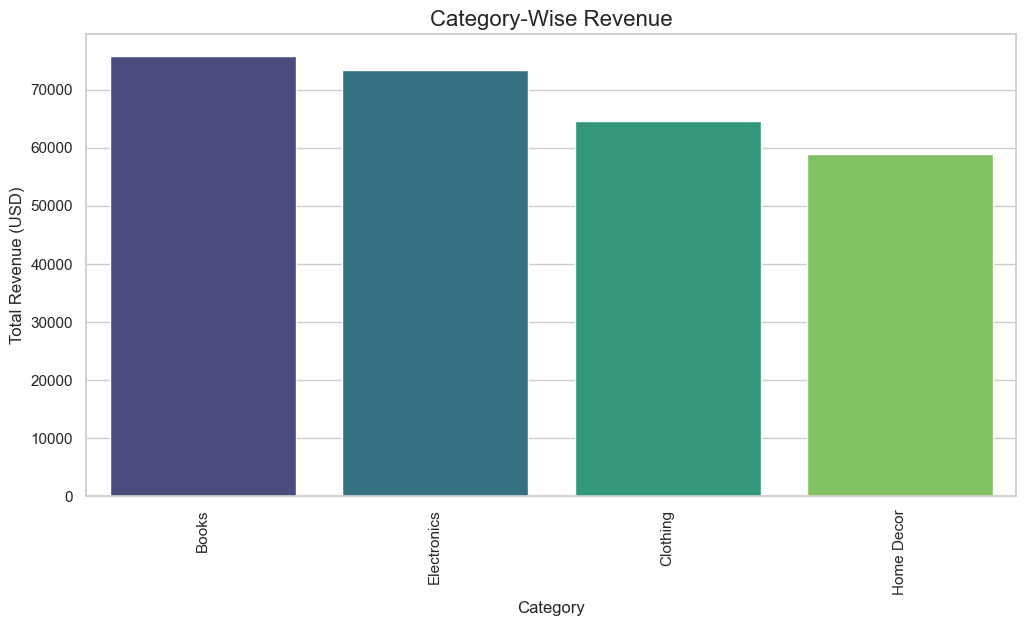

In [7]:
# Aggregating revenue by Category
category_revenue = transactions_full.groupby("Category")["Price"].sum().reset_index().sort_values(by="Price", ascending=False)

# Plotting Category-Wise Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=category_revenue, x="Category", y="Price", palette="viridis")
plt.title("Category-Wise Revenue", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=90)
plt.show()


##  Regional Performance

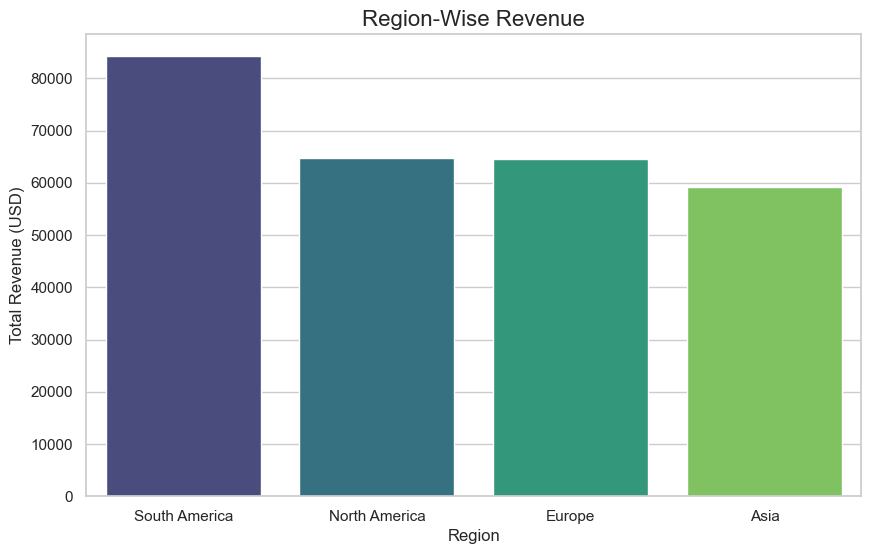

In [14]:
# Aggregating revenue by Region
region_revenue = transactions_full.groupby("Region")["Price"].sum().reset_index().sort_values(by="Price", ascending=False)

# Plotting Regional Revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=region_revenue, x="Region", y="Price", palette="viridis")
plt.title("Region-Wise Revenue", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()


## Product-Wise Revenue 

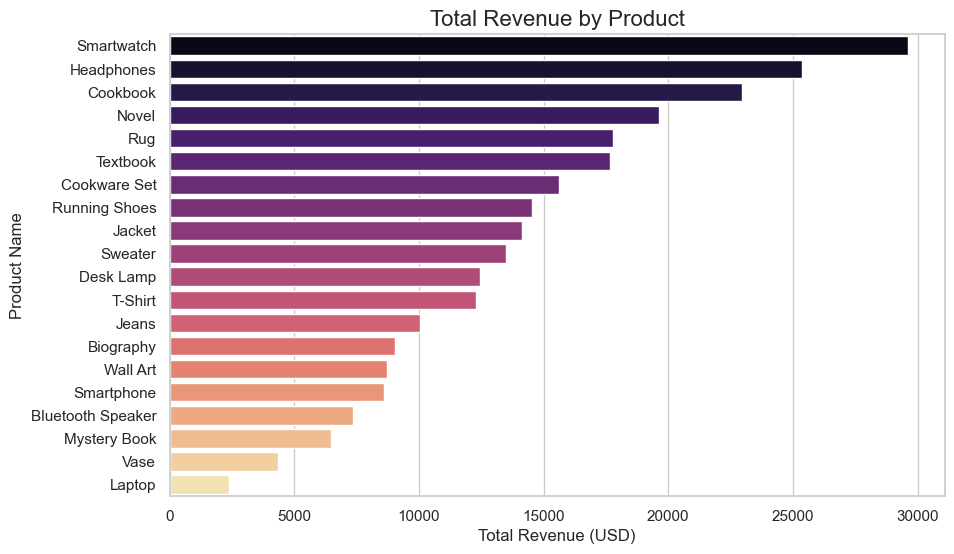

In [18]:
# Aggregating revenue by ProductName
product_revenue = transactions_full.groupby("ProductName")["Price"].sum().reset_index().sort_values(by="Price", ascending=False)

# Plotting Product-Wise Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue["Price"], y=product_revenue["ProductName"], palette="magma")
plt.title("Total Revenue by Product", fontsize=16)
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

## Top Products by Region 

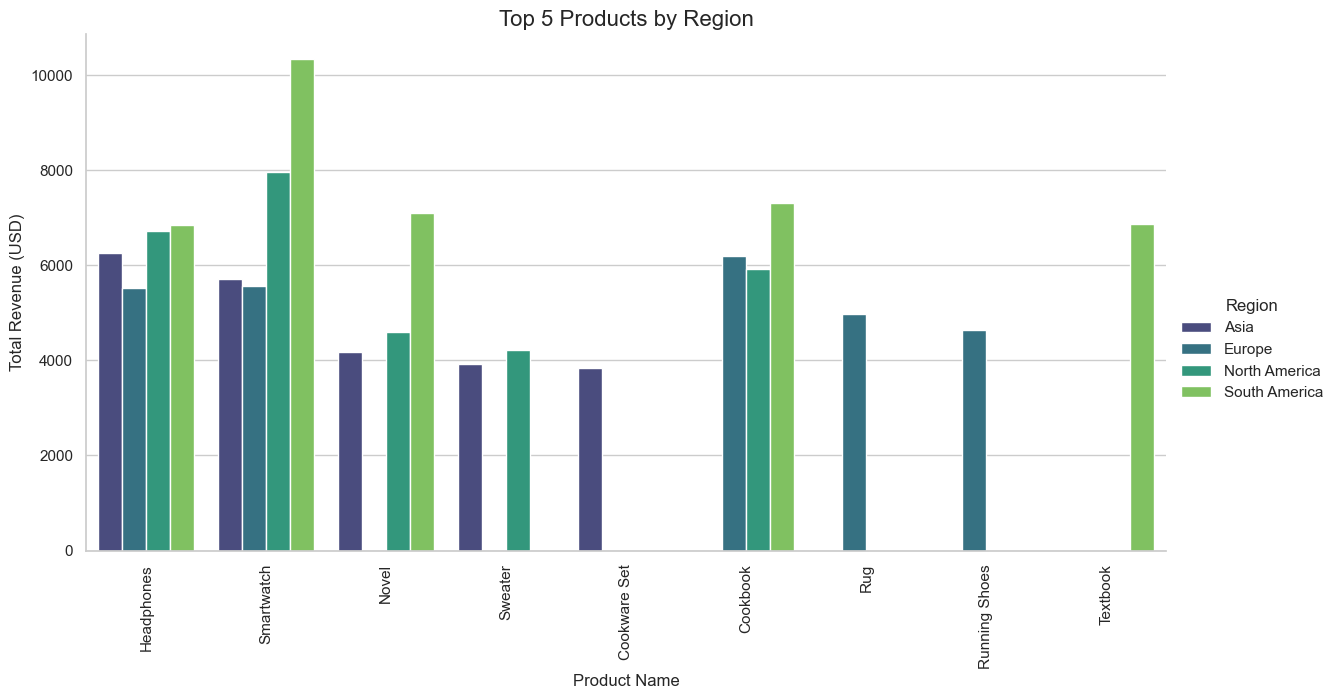

In [15]:
# Finding the top 5 products by revenue for each region
top_products_per_region = transactions_full.groupby(['Region', 'ProductName'])['Price'].sum().reset_index()
top_products_per_region = top_products_per_region.groupby('Region').apply(lambda x: x.nlargest(5, 'Price')).reset_index(drop=True)

# Plotting top products by region
sns.catplot(
    x='ProductName', y='Price', hue='Region', data=top_products_per_region,
    kind='bar', height=6, aspect=2, palette='viridis'
)
plt.title('Top 5 Products by Region', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')
plt.show()


## Regional Revenue Distribution by Products

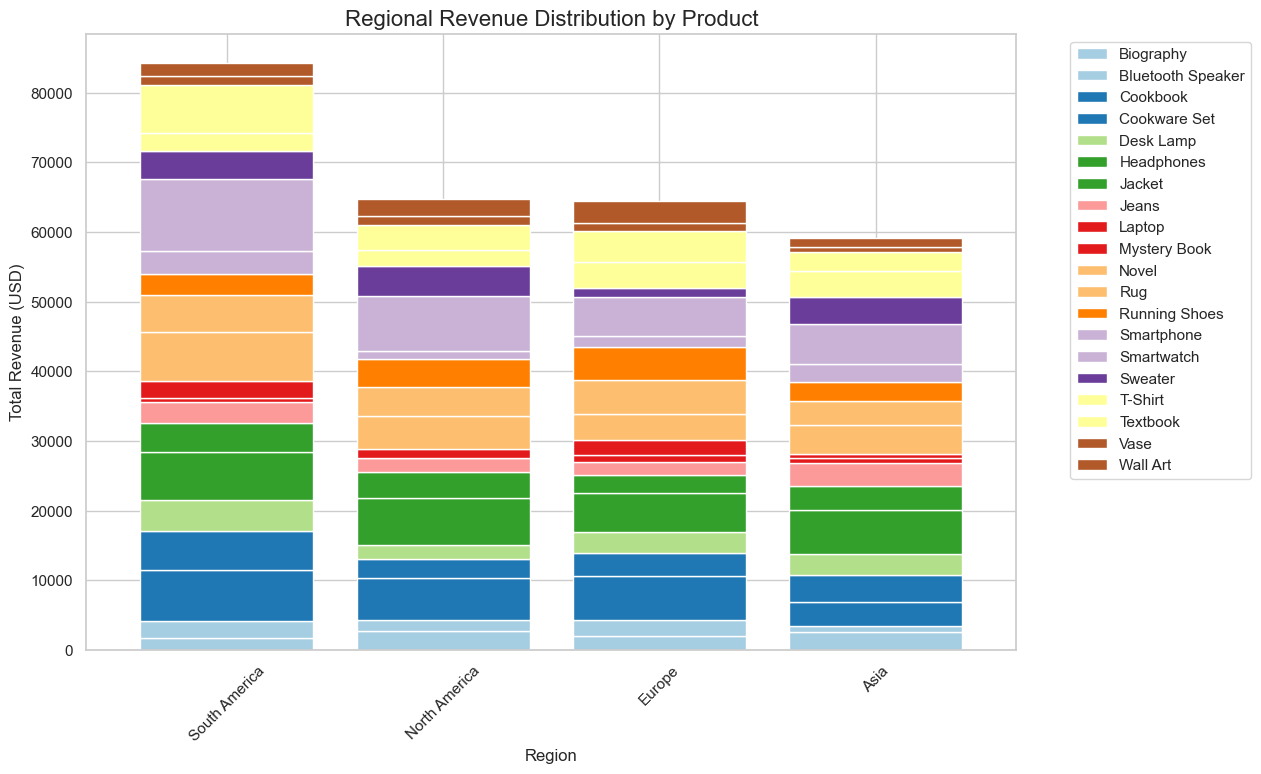

In [21]:
# Aggregating revenue by Region and ProductName
region_product_revenue = transactions_full.groupby(["Region", "ProductName"])["Price"].sum().unstack().fillna(0)

# Sorting regions by total revenue
region_product_totals = region_product_revenue.sum(axis=1).sort_values(ascending=False)

# Plotting regional revenue distribution
region_product_revenue.loc[region_product_totals.index].plot(
    kind="bar", stacked=True, figsize=(12, 8), colormap="Paired", width=0.8
)
plt.title("Regional Revenue Distribution by Product", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()



# Top Products by Revenue Contribution (Heatmap)

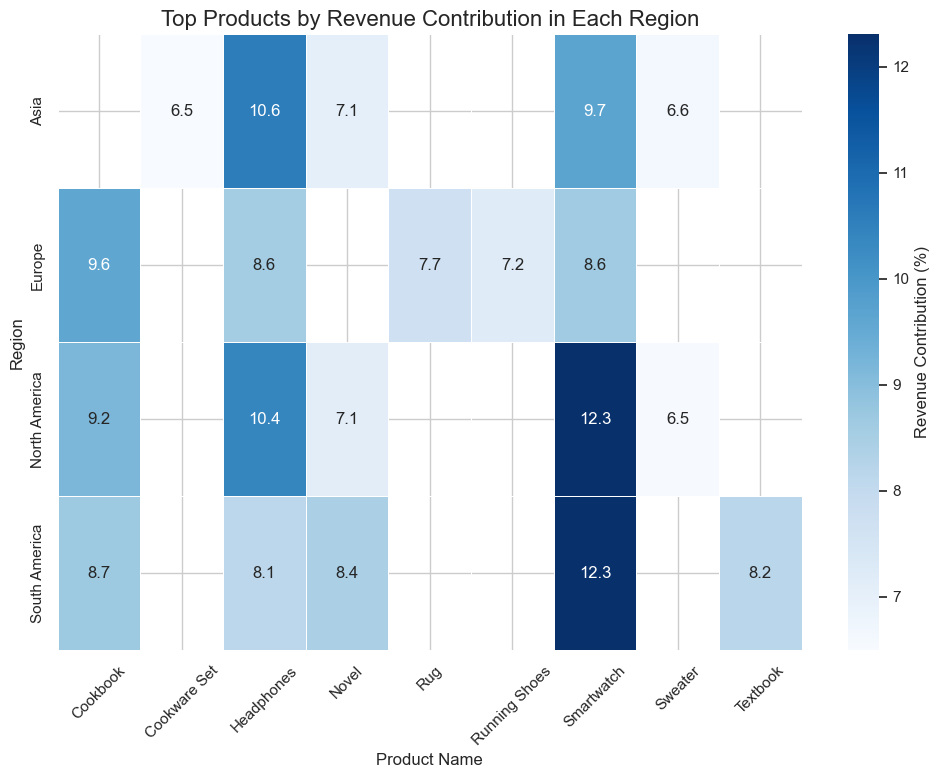

In [17]:
# Aggregating revenue by Region and ProductName
region_product_revenue = transactions_full.groupby(['Region', 'ProductName'])['Price'].sum().unstack().fillna(0)

# Normalize revenue by region to get percentage contribution
region_product_revenue_percentage = region_product_revenue.div(region_product_revenue.sum(axis=1), axis=0) * 100

# Filtering top 5 products per region
top_products_by_region = region_product_revenue_percentage.apply(lambda x: x.nlargest(5), axis=1)

# Plotting heatmap for top products by revenue contribution
plt.figure(figsize=(12, 8))
sns.heatmap(top_products_by_region, annot=True, cmap='Blues', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Revenue Contribution (%)'})
plt.title('Top Products by Revenue Contribution in Each Region', fontsize=16)
plt.xlabel('Product Name')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()


## Correlation Between Products

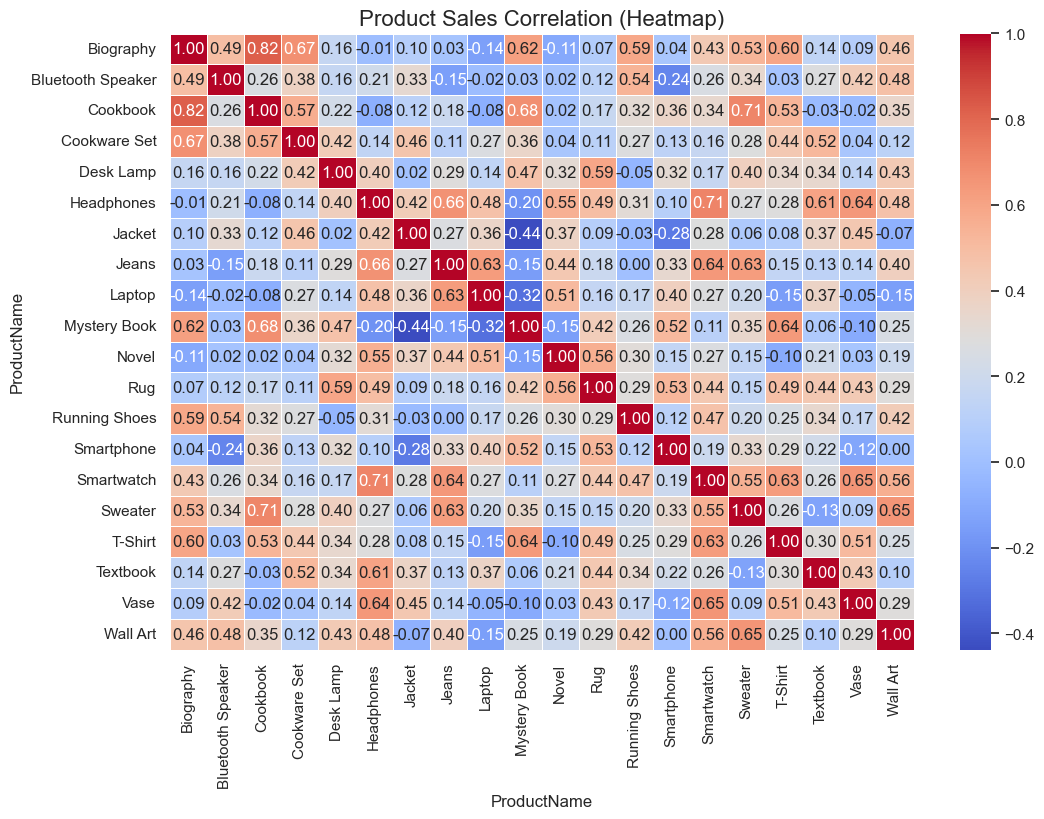

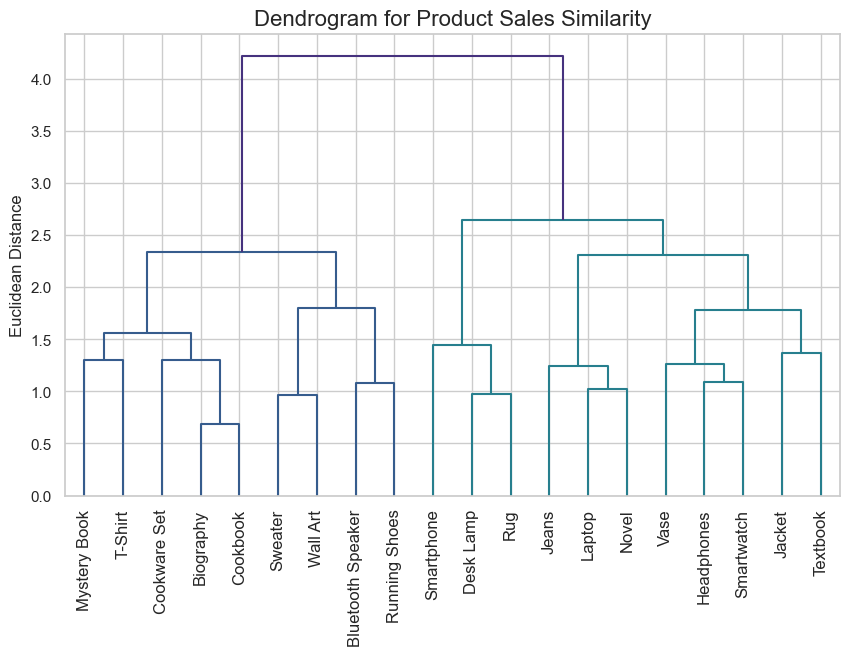

In [23]:
# Pivot table for products over time
product_monthly = transactions_full.pivot_table(
    index=transactions_full["TransactionDate"].dt.to_period("M"),
    columns="ProductName",
    values="Price",
    aggfunc="sum"
).fillna(0)

# Compute correlations between products
product_correlation = product_monthly.corr()

# Heatmap for product correlation
plt.figure(figsize=(12, 8))
sns.heatmap(product_correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Product Sales Correlation (Heatmap)", fontsize=16)
plt.show()
from scipy.cluster.hierarchy import linkage, dendrogram
# Dendrogram for product grouping
link = linkage(product_correlation, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(link, labels=product_correlation.columns, leaf_rotation=90)
plt.title("Dendrogram for Product Sales Similarity", fontsize=16)
plt.ylabel("Euclidean Distance")
plt.show()


## Time Series Forcasting

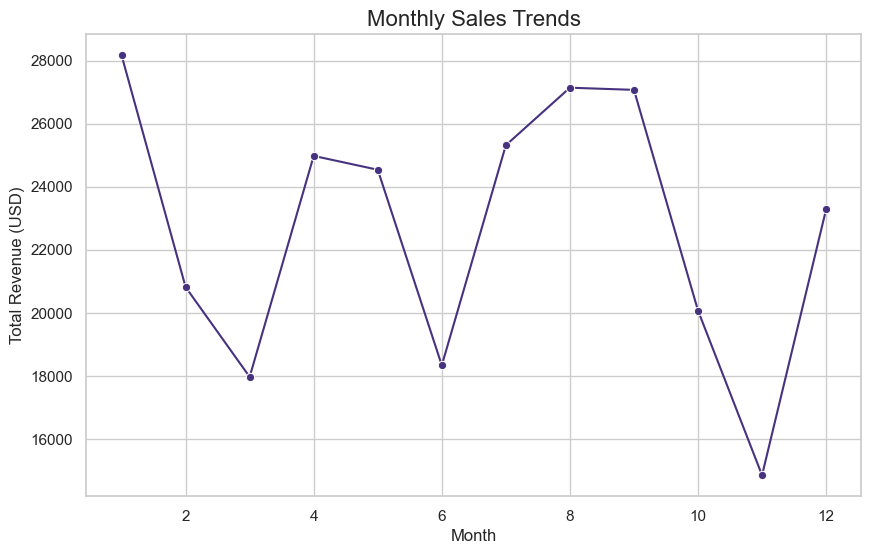

In [20]:
# Extracting Month from TransactionDate
transactions_full["Month"] = transactions_full["TransactionDate"].dt.month

# Aggregating revenue by Month
monthly_sales = transactions_full.groupby("Month")["Price"].sum().reset_index()

# Plotting Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Price", marker="o")
plt.title("Monthly Sales Trends", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()

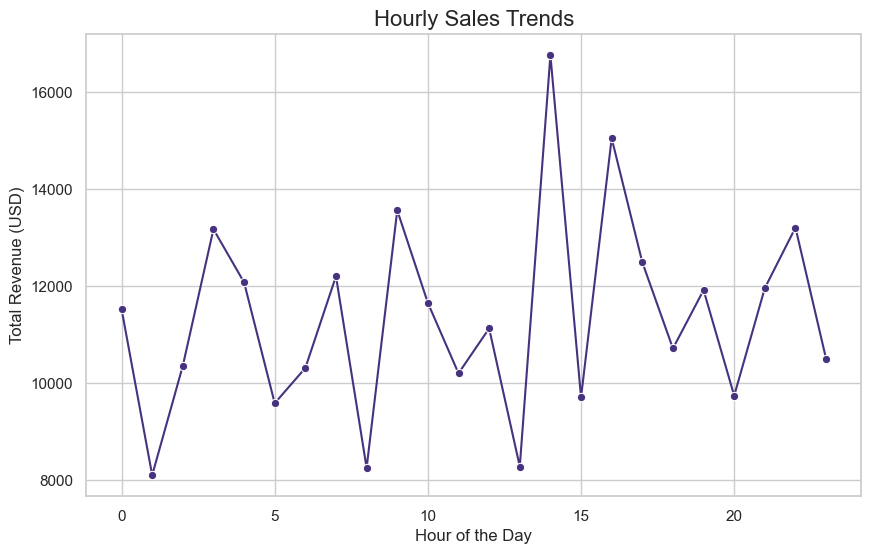

In [19]:
# Extracting Hour from TransactionDate
transactions_full["Hour"] = transactions_full["TransactionDate"].dt.hour

# Aggregating revenue by Hour
hourly_sales = transactions_full.groupby("Hour")["Price"].sum().reset_index()

# Plotting Hourly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sales, x="Hour", y="Price", marker="o")
plt.title("Hourly Sales Trends", fontsize=16)
plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue (USD)")
plt.show()